In [3]:

import matplotlib.pyplot as plt
import numpy as np
import random
import math
from IPython.display import display, HTML
import json
import pathlib
    

In [4]:

def load_config(fname):
    d = {}
    if pathlib.Path(fname).is_file():
        with open(fname,"r") as f:
            d = json.load(f)
    else:
        id = input("Student Id")
        name = input("Student Name")
        d["student_id"] = id
        d["student_name"] = name
        with open(fname,"w") as f:
            json.dump(d,f)
    return d

config=load_config("config.json")
print(config)    


{'student_id': '61275048H', 'student_name': 'patrick bao'}


<!-- <div class="question_frame"> --><!-- start of question_frame -->


In [ ]:
t = """

        <h1>Tim - the Turtle - Breadth First Search</h1>
        <div class="question_body">
            
<p>The grid world is a simple environment. Agents can move in either the "up", "down", "left", or 
"right" direction. The agent can not move diagonally.</p>
<p>Some cells are occupied by obstacles as shown in the figure below.</p>

<p>Tim, the turtle, can move <b>one step</b> in any of the four directions.</p>
</p>



           <a download="Sample Domain" href="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABgwAAASQCAYAAAAgK2SPAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAC4jAAAuIwF4pT92AABKOklEQVR4nOzde5TXBZ3/8dcIjCgKAgOBN5RA45KaUqwc8wKYec0VL2mKZGu3zbZcXY+X7dfF1DVLxbMlamq65qar66qglCgqYBaksI4QB/GCXFQElPsM8P390Yl1/CKYMPP5zszjcQ7n9H1/P9/PvP3jm8VzPp9PValUKgUAAAAAAGjVtit6AQAAAAAAoHiCAQAAAAAAIBgAAAAAAACCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAACRpW/QCNK01a9bkpZdeKnoNqDh1dXVZtGjRZo/p0aNHqqurm2gjKJ7vBZRbsWJNXnhhwWaPqampSbt27ZpoI6gMq1atzZw5b272mD59umfHHbdvoo2geC++OD233TZms8d06LBd2rb1u5zwfldffXUOOeSQoteAVqmqVCqVil6CplNbW5uBAwcWvQZUnN69e2fu3LlFrwEVxfcCyu299+CUSt8oeg0AmoElS+7Nu++OLXoNaJYOPvjgTJkypeg1oFWSsQEAAAAAAMEAAAAAAAAQDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAABI0rboBag8DzzwQPr06VP0GtCknn322XzlK1/Z7DG+G7Q2vhdQ7qGHns2YMUVvAUBL0aHDLtlvv35FrwFNasaMGVm5cmXRawAfQDCgTJ8+fTJgwICi14Am9dprr23xGN8NWhvfCyj3+9/PTbKk6DUAaCH22WdApkyZVPQa0KSGDBmSZ555pug1gA/glkQAAAAAAIBgAAAAAAAACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAECaWTAolUrZe++9U1VV1eBPmzZtMn/+/KLXAwAAAACAZqtZBYMJEybklVdeKZtv2LAht99+e5PvAwAAAAAALUWzCga//OUvP/C9W2+9NaVSqQm3AQAAAACAlqPZBIMlS5bkv//7vz/w/blz52bixIlNtxAAAAAAALQgzSYY3HXXXVm7dm2DWVVVVYPXm7sCAQAAAAAA+GDNJhi8Pwb07ds3J510UoPZ/fffn3feeacp1wIAAAAAgBahWQSDadOmZfr06Q1mI0eOzNlnn91gtnr16vz6179uytUAAAAAAKBFaBbB4P1XF1RVVeWss87K0Ucfne7du2/2WAAAAAAAYMsqPhhs6qqBQw89NL169Urbtm1zxhlnNHhvU1cjAAAAAAAAm1fxweC+++4rey7Be29F9P7bEiWuMgAAAAAAgL9VxQeD9//l/4477piTTz554+sDDjgg++23X4Nj7rrrrqxdu7ZJ9gMAAAAAgJagooPBSy+9lCeffLLB7MQTT8zOO+/cYPb+qwyWLFmSBx54oLHXAwAAAACAFqOig8Gtt96aUqnUYLapWxB96UtfSps2bRrM3JYIAAAAAAA+vIoNBuvXr8/tt9/eYLbrrrtm+PDhZcd+7GMfy1FHHdVgNmHChLz22muNuSIAAAAAALQYFRsMHn300SxYsKDB7Mwzz8x222165fdfebBhw4bcdtttjbYfAAAAAAC0JBUbDDZ1S6GRI0d+4PEnnHBCdtlllwaz2267reyWRgAAAAAAQLmKDAZvvvlmHn744QazAw88MAMGDPjAz7Rv3z6nnXZag9mrr76axx57rFF2BAAAAACAlqQig8Edd9yR+vr6BrNNPez4/TZ1BYKHHwMAAAAAwJZVZDB4/1/yt2vXLqeffvoWPzdkyJD07du3weyBBx7IkiVLtul+AAAAAADQ0lRcMJgyZUpmzZrVYPb5z38+3bp1+1Cff/9VBmvXrs1dd921zfYDAAAAAICWqOKCwaZuIfRhbkf0V2eddVaqqqq2eE4AAAAAAOD/VFQwWLFiRe65554Gs86dO+f444//0Ofo1atXDj/88Aaz6dOnZ9q0adtiRQAAAAAAaJEqKhj85je/yYoVKxrMTjvttFRXV/9N59nUFQmuMgAAAAAAgA9WUcFgU3+pf+ONN6aqqupv+jNq1Kiy89x9991Zs2ZNE/xTAAAAAABA81MxwWDmzJl55plnGu38y5Yty3333ddo5wcAAAAAgOasYoJBU9wyyG2JAAAAAABg09oWvUCS1NfX584772wwq66uTr9+/bbqvPPmzcuSJUs2vp44cWLmzp2b3r17b9V5AQAAAACgpamIYPDQQw/lzTffbDD7+7//+/znf/7nVp33F7/4Rb75zW9ufF0qlXLrrbfm8ssv36rzAgAAAABAS1MRtyTa1K2CzjzzzK0+76mnnpp27do1mP3qV7/Khg0btvrcAAAAAADQkhQeDObPn5/x48c3mHXr1i2f//znt/rcXbt2zTHHHNNg9vrrr5f9PAAAAAAAaO0KDwa333571q9f32B22mmnpW3bbXO3pE1dqeDhxwAAAAAA0FChweCvzxR4v21xO6K/Ov7449OpU6cGswcffDCLFy/eZj8DAAAAAACau0KDwcSJEzN37twGs759+2bw4MHb7Gdsv/32OeWUUxrM6uvrc+edd26znwEAAAAAAM1docGgsR52/GHO6bZEAAAAAADwfwoLBsuWLct9991XNm+MYHDooYdmzz33bDCrra3Ns88+u81/FgAAAAAANEeFBYNf//rXWbNmTYPZwQcfnN69e2/zn1VVVZUvfelLZXNXGQAAAAAAwF8UFgy++c1vplQqNfgzZcqURvt5V1xxRdnPu+mmmxrt5wEAAAAAQHNS6DMMAAAAAACAyiAYAAAAAAAAggEAAAAAACAYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAAJK0LXoBmlZdXd0Wj5kzZ04TbAKVZeHChVs8xneD1sb3Asq99dZbSdoUvQYAzUL1Fo+YNevFfOpTn2mCXaByzJ794haPWbdufRNsAmyKYNDKLFq0aIvHnHjiiY2/CFSY3r17b/EY3w1aG98LKLf33oOTfKPoNQBoBrbffo8tHrN69dI8//wfm2AbaF6WL19b9ArQarklEQAAAAAAIBgAAAAAAACCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAABJ2ha9AE2rR48e6d2792aPufTSS9OzZ88m2ggqw8yZM3P//fdv9piRI0dmjz32aKKNoHi+F1Duf/93Zu677782e8wJJ5yQHj16NNFGUBmmTn0ljz7aseg1oKK0b79vunX79maPWbHi99mwYUUTbQTNxznnfKvoFaDVEgxamerq6sydO3ezxwwePDgDBgxooo2gckyePHmz748ZM8Z3g1bH9wLKXXTRP2/2/Vtvvcr3glbooTz66JKil4CK0qZNh3TocOBmj9nS+9Ba+d9SUBy3JAIAAAAAAAQDAAAAAABAMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAAJK0LXqB93rllVey9957/02f2W677bLTTjulY8eO2W233bL//vvn05/+dE466aR06dKlkTYFAAAAAICWpdlfYbBhw4a8++67ef311/Pss8/mpptuyrnnnpuePXvmi1/8Yl599dWiVwQAAAAAgIrX7IPBB6mrq8tvfvOb9O/fP3fccUfR6wAAAAAAQEWrqFsSbUqHDh3Sp0+fD3y/vr4+77zzThYuXJgNGzaUvb9q1aqMGjUq69evz5e//OXGXBUAAAAAAJqtig8GgwYNysSJE7d43KpVq/L73/8+v/zlL3P33XenVCptfK9UKuW8887L0KFD06tXr0bcFgAAAAAAmqcWc0uiHXfcMUOHDs1dd92VsWPHpn379g3eX7lyZa688sqCtgMAAAAAgMrWYoLBex199NH54Q9/WDZ/4IEHNnnbIgAAAAAAaO1aZDBIkq997Wtp165dg9kbb7yRBQsWFLQRAAAAAABUrhYbDDp27Jh99tmnbL5o0aICtgEAAAAAgMrWYoNB8pdo8H5uSQQAAAAAAOVadDBYvHhx2axbt24FbAIAAAAAAJWtxQaDRYsWZc6cOQ1mnTp1yl577VXMQgAAAAAAUMFabDC46qqrUiqVGsxOPPHEVFVVFbQRAAAAAABUrrZFL7CtlUql/OxnP8v111/fYF5dXZ1/+Zd/KWgrAAAAAACobM0+GNTX12f58uWZM2dOpkyZkttvvz3Tp08vO2706NHp379/ARsCAAAAAEDlq/hg8OSTT27VbYR233333HDDDTnxxBO33VIAAAAAANDCtNhnGBxyyCG5//778/LLL4sFAAAAAACwBRV/hcFHNWnSpMyZMyfPP/98vv3tb6dr165FrwQAAAAAABWr4oNBhw4d0qdPn80es2LFiixdujRLlixpMF+0aFF++MMf5sYbb8wvf/nLHHfccY25KgAAAAAANFsVHwwGDRqUiRMnfqhjFy5cmMcffzw33nhjJk2atHH+5ptv5sQTT8wdd9yRM844o5E2BQAAAACA5qtFPcOgZ8+e+dKXvpSnn346o0ePbvCw5PXr1+ecc85JbW1tgRsCAAAAAEBlalHB4L3OO++8XHjhhQ1ma9euzXnnnVfQRgAAAAAAULlabDBIkksuuSQ77rhjg9kTTzyRF154oaCNAAAAAACgMrXoYNCpU6d89rOfLZuPHz++gG0AAAAAAKBytehgkCR9+/Ytm02fPr2ATQAAAAAAoHK1+GDQsWPHstnixYsL2AQAAAAAACpXiw8G77zzTtmsTZs2BWwCAAAAAACVq8UHg1mzZpXNevToUcAmAAAAAABQuVp0MFi6dGkmT55cNu/Xr18B2wAAAAAAQOVq0cHgRz/6UdasWVM2P+GEEwrYBgAAAAAAKleLDQbXXXddrr322rL50KFD06dPnwI2AgAAAACAytW26AW2pYULF2bChAn5xS9+kSlTppS9365du9xwww0FbAYAAAAAAJWt4oPB1KlTc8ABB2z2mJUrV2bJkiVZsmTJBx7Ttm3b3HXXXenfv/823hAAAAAAAJq/ig8GK1euzPTp07fqHD169MjNN9+c4447bhttBQAAAAAALUuLfYZBktTU1OSCCy7IrFmzxAIAAAAAANiMir/C4MOorq5Ox44d06lTp/Tp0ycHHnhghgwZkqOOOirt2rUrej0AAAAAAKh4FRUM9tprr5RKpaLXAAAAAACAVqdF35IIAAAAAAD4cAQDAAAAAABAMAAAAAAAAAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQJK2RS9A06qrq9viMXPmzGmCTaCyLFy4cIvH+G7Q2sybtzDt2u262WOefvrPefXV1U20ERTvuecWZocdDtjsMU88Mcv3glZn5sy3krQpeg0AWoj6+vqiV4BWq6pUKpWKXoKm88gjj+SYY44peg2oOL17987cuXOLXgMqyt57D06p9I2i1wAAAFqZyy7rkq985fii14BWyS2JAAAAAAAAwQAAAAAAABAMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAEjStugFaFo9evRI7969N3vMpZdemp49ezbRRlAZZs6cmfvvv3+zx4wcOTJ77LFHE20ExZs0aXZ+/euitwAAaLlOPLE+Awd+rOg1oEm99dZbuemmmzZ7zMCB/95E2wDvJxi0MtXV1Zk7d+5mjxk8eHAGDBjQRBtB5Zg8efJm3x8zZozvBq3KggXrkiwpeg0AgBbryCMPyDHHDCp6DWhStbW1ufjir2z2mJ12at9E2wDv55ZEAAAAAACAYAAAAAAAAAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgCRti17goyqVSpk9e3bmzJmTefPmZfny5Vm7dm123nnndO7cOV26dMnAgQOz1157Fb0qAAAAAABUvGYVDFauXJn/+q//yv33358nn3wy77zzzhY/U1NTk8GDB2fEiBEZMWJEOnbs2ASbAgAAAABA89Isbkm0YsWK/Ou//mv22GOPjBo1Kg8++OCHigVJsnjx4owdOzbnnHNOevTokZEjR2bu3LmNvDEAAAAAADQvFR8Mfve732XffffN5ZdfnqVLl27VuVavXp0777wzn/jEJ/Ltb387a9as2UZbAgAAAABA81bRtyS66qqrcskll6RUKm3y/c6dO2f48OHp169funXrlm7duqVUKmXZsmV5+eWXM3Xq1DzzzDNZvXp1g8/V19fnhhtuyPnnn+8ZBwAAAAAAkAoOBpdddll+/OMfb/K9z3/+87n00ktz8MEHp02bNps9z6pVq/LQQw/lhhtuyOTJkxtjVQAAAAAAaPYq8pZEt9xyyyZjQc+ePfP444/nkUceySGHHLLFWJAkO+64Y0477bRMmjQpEyZMyMCBAxtjZQAAAAAAaNYqLhjMnDkz5513Xtl83333zZQpU3LEEUd85HMPHTo006ZNywUXXLA1KwIAAAAAQItTcbck+trXvlb2MOIuXbrk8ccfz6677rrV56+urs5PfvKTHHjggamurt7q8wEAAAAAQEtQUcFg3Lhxefrpp8vmv/jFL7ZJLHiv008/fZueDwAAAAAAmrOKuiXRtddeWzYbOnRoTj311AK2AQAAAACA1qNigsG8efMyYcKEsvk//uM/FrANAAAAAAC0LhUTDB566KGUSqUGsx49euSEE04oaCMAAAAAAGg9KiYYPPHEE2WzQw89NG3bVtRjFgAAAAAAoEWqmGDwpz/9qWz2mc98poBNAAAAAACg9amIYFBXV5eXX365bD5o0KACtgEAAAAAgNanIoLB/Pnzy55fkPzlGQYAAAAAAEDjq4hgsHTp0k3Od9lll6ZdBAAAAAAAWqmKCAarV6/e5LxTp05NvAkAAAAAALROFREMNnU7oiSpqqpq4k0AAAAAAKB1qohgsMMOO2xyvmzZsqZdBAAAAAAAWqmKCAZdunTZ5FwwAAAAAACAplERwWC33Xbb5O2H3njjjQK2AQAAAACA1qcigkF1dXX22muvsvnUqVObfhkAAAAAAGiFKiIYJMlBBx1UNvvDH/5QwCYAAAAAAND6VEwwOPzww8tmTz31VNavX9/0ywAAAAAAQCtTMcHg+OOPL3uOwcKFC/Pggw8WtBEAAAAAALQeFRMM9txzzwwbNqxs/vOf/7yAbQAAAAAAoHWpmGCQJN/5znfKZo899ljuu+++pl8GAAAAAABakYoKBscee2wOOeSQsvnXvva1LFy4cJv+rLvvvjsLFizYpucEAAAAAIDmqqKCQZKMGTMm7du3bzB7++23M2zYsMybN2+rz19XV5cLLrggZ5xxRurq6rb6fAAAAAAA0BJUXDDo379/Ro8eXTafOXNmDj744Dz55JMf+dwTJkzIgQcemJ/+9KdbsyIAAAAAALQ4FRcMkuTcc8/NJZdcUjafP39+Dj/88Bx77LGZMmVKNmzYsMVzrV69Ovfcc08++9nPZvjw4amtrW2MlQEAAAAAoFlrW/QCH+THP/5xOnTokMsuuyylUqnBe+PGjcu4cePSpUuXDB8+PP37909NTU1qamqSJMuWLcvcuXMzbdq0PPPMM1m1alUR/wgAAAAAANBsVGwwSJJLLrkkBx10UM4555xNPqB4yZIlueeee/7m8+6www75p3/6p/Ts2XNbrAkAAAAAAM1eRd6S6L2OOuqo/PnPf86ll16aXXbZZavOtdNOO+WrX/1qZs+enSuvvDLbb7/9tlkSAAAAAACauYoPBslf/qL/8ssvz+uvv57bbrstxx57bDp27PihPtu9e/eccMIJufPOO/PGG29kzJgx2X333Rt5YwAAAAAAaF4q+pZE79ehQ4eMGjUqo0aNyoYNG/LnP/85c+bMybx587JixYqsXbs2O++8czp37pyuXbvmk5/8ZHr16lX02gAAAAAAUPGaVTB4r+222y79+vVLv379il4FAAAAAACavWZxSyIAAAAAAKBxCQYAAAAAAIBgAAAAAAAACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACAJG2LXoDKM2fOnKJXgCa3cOHCLR7ju0Fr89ZbbyVpU/QaAAAt1muvvZba2h2KXgOalP9vDZWtqlQqlYpegqZTW1ubgQMHFr0GVJzevXtn7ty5Ra8BFWXvvQenVPpG0WsAALRY8+dfkvr6BUWvARXnhRdeyIABA4peA1oltyQCAAAAAAAEAwAAAAAAQDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIElVqVQqFb0ETWfNmjV56aWXil4DKk5dXV0WLVq02WN69OiR6urqJtoIirdixZq88MKCzR5TU1OTdu3aNdFGULxVq9Zmzpw3N3tMnz7ds+OO2zfRRlAZfDegXH19fRYvXrzZYwYO3DU77dS+iTaC5uPjH/942rf33YAiCAYAAAAAAIBbEgEAAAAAAIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACAJG2LXgAAgP+zatWqzJkzJ/Pmzcv8+fOzfPnyrF69Ou3bt88uu+ySbt265YADDkivXr2KXhUAoFlYv359ZsyYkVmzZmXRokVZuXJltt9++3Ts2DF77bVX9tlnn+y9995FrwlQEQQDAAo1b9681NbW5vXXX8+yZctSV1eXzp07p3PnzvnEJz6RT37yk2nTpk3Ra0KjWL9+faZNm5bJkydnypQpmT59el566aVs2LBhi5+tqanJiBEjcs455+Qzn/lME2wLANC8PPHEE7npppsybty4vPvuu5s9tqamJkOGDMkxxxyTk08+OV27dm2iLQEqS1WpVCoVvQS0dEuWLMnUqVM3/pk2bVpee+21suN8HWkNZs2alfHjx+fxxx/PU089lWXLlm32+A4dOuTwww/P17/+9RxzzDHZbjt306PlmDVrVvr167fV5znppJNy/fXXZ/fdd98GW0HzUiqVcsQRR+TJJ58se++www7LxIkTm34paCSjRo3Kr371q21yrqOOOiqPPvroNjkXVJqZM2fmG9/4xib/3fBh3HnnnTnzzDO38VYAzYMrDKARvPDCCxk7dmymTZuWqVOn5uWXXy56JSjU6tWrc8011+See+7JCy+88Dd9duXKlRk7dmzGjh2bAQMG5Pbbb8+gQYMaaVNonu6///5MnDgx48eP9/2g1bnhhhs+8l8IAdDy3HHHHfn617+e1atXF70KQLMkGEAjuOWWW3L99dcXvQZUjDfeeCPf+973tvo8tbW1Ofjgg3PttdfmW9/61jbYDCpLVVVV+vXrl4EDB6ZPnz7Zc889s/POO6e6ujorVqzI/Pnz89xzz2X8+PFZsWJFg88uWbIkw4YNyx/+8Ifsu+++Bf0TQNOaM2dOLr744qLXAKBCXHvttTn//PPL5lVVVfnUpz6VI488Mrvttlu6d++edevWZenSpZk1a1aef/75PPvss1m3bl0BWwNUFsEAgEL16dMnhx12WPr27Zvu3bunQ4cOWbJkSZ5//vmMGzcu8+bNa3D8unXrct5556W6ujpf/epXC9oato2qqqrsu+++Ofroo3PUUUfl4IMPTqdOnbb4udWrV2f06NH5/ve/nzVr1mycv/vuu/nKV76Sp59+OlVVVY25OhRuw4YN+fKXv5xVq1YVvQoUpl27dunfv/9H+uzHP/7xbbwNFOvuu+/OP//zP5fNTz311Fx11VVbfKjxu+++m3HjxuWWW25xG1SgVRMMoAlVV1dn4MCBGTRoUO65554t3rsdWqr+/ftn1KhROeOMM7Lbbrt94HHr1q3LbbfdlvPPP7/st6nPO++8HH744dlnn30ae11oNPvuu29mzZr1N39uhx12yEUXXZQhQ4Zk+PDhqaur2/je5MmT89RTT+Wwww7blqtCxbnuuusyadKkja8HDx6cZ599tsCNoOntuuuuef7554teAwo3e/bsfPWrX23wXMB27drlrrvuyimnnPKhztGxY8d88YtfzBe/+EXPFwRaNckUGknbtm2z33775ZxzzsnPf/7z/OEPf8jy5cszbdq0jBkz5kP9Bim0NH99KGVtbW0uvPDCzcaC5C/fo3PPPTeTJ0/OLrvs0uC9urq6Tf4GEbQmn/3sZ/Pd7363bH7vvfcWsA00ndmzZ+eyyy7b+Lpr164ZPXp0gRsBUKRvfOMbZb9gdPfdd3/oWPB+rtQEWjNXGEAjuOiii3LllVdmhx12KHoVqAidOnXKxIkTP/JvPO+333655ZZbcvLJJzeYP/LII1m8eHFqamq2xZrQLJ155pn5t3/7twazF198saBtoPFt2LAho0aNavAwy+uuuy7du3cvcCsAivLwww/n8ccfbzAbOXJkRowYUdBGAM2bKwygEfTs2VMsgPfo3LnzVt8eZcSIEdlvv/0azNavX59HHnlkq84Lzd2m7kG9cOHCAjaBpnHNNdfkmWee2fj62GOPzZlnnlngRgAU6f2/OLH99tvnmmuuKWgbgOZPMACg2Tj66KPLZnPnzi1gE6gc733o8V9VV1cXsAk0vpkzZ+Z73/vextcdO3bMjTfeWOBGABTpz3/+c4Pn2STJcccdl27duhW0EUDzJxgA0GzsueeeZbNFixYVsAlUjj/+8Y9ls01ddQDN3fr163P22Wdn7dq1G2fXXHNNdt999wK3AqBIm3pu0+mnn17AJgAth2AAQLOxatWqspnbf9Ha/eQnPymbfe5znytgE2hcV199dYNANmzYsJx77rkFbgRA0X73u9+Vzf7u7/6ugE0AWg4PPQag2ZgzZ07ZrGfPngVsAsWrr6/Pd77znTz22GMN5t26dctZZ51V0FbQOGpra/P9739/4+sOHTrk5ptvLm4hAAq3fv36PPvssw1mNTU12W233Ta+fuedd/If//EfGTduXGbMmJE333wz7dq1S01NTXr27JlDDz00n/vc53LEEUdku+38Ti1AIhgA0EysW7cu//M//1M2//SnP13ANlCcV155JWPHjs3o0aMze/bsBu9VVVXl5ptvTocOHQraDra9devW5eyzz05dXd3G2RVXXJG99967wK2gMqxatSpXXnllJk2alFmzZuWtt97K2rVr06VLl3Tp0iX77LNPDj300AwdOjT7779/0evCNjV79uwGt6lLkr59+278zzfddFMuuOCCLF++vMExdXV1WblyZV599dX8/ve/z9VXX50BAwbkhz/8YU466aQm2R2gkgkGADQLDz74YNnzCrp06ZJDDjmkoI2g8QwZMqTBLbhKpVJWrlyZN998s+z/9P5VdXV1brzxxnzhC19oqjWhSVx55ZWZNm3axtdDhgzJt771rQI3gsrx1ltv5ZJLLimbL1q0KIsWLcqLL76YBx54IMlfvjsXXXRRTjjhhCbeEhrH3Llzy2adOnXK2rVrc/LJJ+fhhx/+0Oeqra3NiBEjcu655+bf//3f065du225KkCzIhgAUPHWrFmTiy++uGz+5S9/OW3b+lcZLc+MGTOycuXKD3380KFD89Of/jQHHHBA4y0FBZgxY0Z+9KMfbXzdvn373HrrrW4bAR/BlClT8oUvfCGnnHJKbrnllnTs2LHolWCrLFy4sGy200475ayzziqLBVVVVenevXu6dOmSZcuW5Y033siGDRvKPn/zzTdnwYIFefDBB/27Bmi1/LcfABXv4osvLrv1SufOnXPRRRcVtBFUhv322y9PPfVUJkyYIBbQ4tTX1+fss89OfX39xtn/+3//L/vuu2+BW0Fl6tKlS3r37p3+/funZ8+em/3t6HvvvTcHHXRQ2ZWb0NwsXbq0bDZ27Njce++9G1937do1P/vZz/L6669vvOpmwYIFeeONN3LTTTc1eN7Be8/x3ufmALQ2ggEAFe2+++7LddddVza/5ppr0q1bt6ZfCCrIjBkzcsQRR+TUU0/N9OnTi14HtqnLL788zz///MbXBx10UC688MLiFoIK8slPfjIXX3xxHn/88SxevDhvv/12XnrppdTW1mbBggVZvnx5nn766Xz3u9/NTjvtVPb5OXPm5Pjjj29w+ztobt7//IIkWb169cb/fMABB6S2tjbf/e53s+uuuzY4rqamJueee25mzpyZI444ouw8l19+eV588cVtvzRAMyAYAFCxpk2blpEjR5bNR4wYkXPOOaeAjaBprFixIqVSaeOf+vr6vPXWW3n++edz880353Of+1yqqqqSJOvXr8+9996bQYMG5cc//nHBm8O28dxzz+WKK67Y+Lpdu3a59dZb06ZNmwK3guIde+yx+eMf/5gZM2bkiiuuyBFHHJGuXbuWHbf99tvnkEMOyc9+9rO88sorOf7448uOmTp1qqs1adZKpdIHvte9e/f89re/zcc+9rHNnmPnnXfOww8/nH322afs3FddddU22ROguREMAKhIc+fOzXHHHVf2m2+f+MQncttttxW0FRSjbdu2qampyf77759/+Id/yPjx4/OnP/0p+++//8Zj1q1bl8suuyznn39+gZvC1qurq8vZZ5+ddevWbZxdfPHF2W+//QrcCirDKaeckkGDBv1Nn+natWsefPDBTf6yxZgxYzb54FhoDjZ3662rr776Q1+NvOOOO+bnP/952fzuu+/O8uXLP/J+AM2VYABAxZk/f36GDx9edm/dPfbYI48++mh23nnngjaDynHAAQdk0qRJGTx4cIP5tdde2+DevdDc/OAHP8j//u//bnw9cODAXHrppQVuBC3DmDFjctBBBzWY1dfXZ/To0QVtBFunQ4cOm5zX1NTk9NNP/5vONWzYsPTr16/BbN26dZk8efJH3g+guRIMAKgob775ZoYPH56XX365wbxHjx557LHH0qtXr4I2g8qz00475Te/+U122GGHBvMLL7ywwW9nQ3MxderUXH311Rtft2nTJrfeemuqq6sL3ApahrZt227yFiuPPPJIAdvA1tvU7biS5LDDDvtI/9448sgjy2aTJk36m88D0NwJBgBUjLfffjvDhg3LrFmzGsxramry2GOPld1bFEh69eqVs846q8Hs1Vdfzfjx4wvaCD6atWvXZtSoUQ1i1/nnn59Pf/rTBW4FLcuwYcPK7uk+e/bsvP766wVtBB9dz549Nzn/1Kc+9ZHOt6nPLViw4COdC6A5EwwAqAhLly7NkUcemRdeeKHBvEuXLnnssccyYMCAgjaDynf00UeXzSZOnNj0i8BWuP7661NbW7vxdd++ffODH/ygwI2g5amqqsqhhx5aNn/ttdcK2Aa2Tu/evTc5/6ArD7ZkU597++23P9K5AJqztkUvAADvvPNOjjzyyDz33HMN5rvsskt++9vfNniwK1Bur732+v/t3V9o1fUfx/FX8xfb/LdpynIo6oVWFGmHGoaFRrTKBCGGWASB4UVZXUR1UVAXURdqqBVEYd1FghAtTRO6GBrSn8mUhkFBs7I2XOTM/Wur/F0Fv3X2S91sx+njAd68z/l+eF84PO55zvkWzdzEkvHm7+/iPHXqVG6++eazvn5gYKBo1tzcnMWLFxfNDx06dK7rwUVjuHdld3Z2lmATGJ05c+Zk8uTJ6e7uHjIvLy8f0XkVFRVFs/7+/hGdBTCeCQYAlNSvv/6a+vr6HDx4cMh86tSp2bt3b9HN+YBiw/0H99SpUyXYBM6fjo6OdHR0jOqMnp6eHD58+DxtBBeH4W4U29fXV4JNYHTKyspSKBSyb9++IfOTJ0+O6Lyurq6i2Ug/rQAwnvlKIgBK5tSpU7nzzjvz+eefD5lPmTIle/fuTV1dXYk2g/Hl+PHjRbMZM2aUYBMALnTDfZrAvxmMV8uXLy+atbW1jeiso0ePFs1mzpw5orMAxjPBAICS6O7uzl133ZVPP/10yHzy5MnZs2dPlixZUqLNYPz5+89Rklx55ZUl2ASAC91XX31VNPNLUcare+65p2h24MCBEZ013HUjvYEywHgmGAAw5np6erJixYqiF+WTJk3K7t27s3Tp0hJtBuPP6dOns3379qL5uXz3O1wItmzZktOnT4/4z3DvKF22bNmwz4VL1S+//FIUmSsqKrJw4cISbQSjU1dXlwULFgyZNTc3DxvG/snPP/+cPXv2FM1vv/32Ue0HMB4JBgCMqd7e3qxcuTL79+8fMp84cWI+/PDD3HrrrSXaDManbdu2Fd0wvLy8PHfffXeJNgLgQrVp06b88ccfQ2bLly9PZWVliTaC0XvssceKZs8///w5nfHiiy/mt99+GzKrq6vLnDlzRrUbwHgkGAAwZvr7+7Nq1ao0NTUNmVdWVmbXrl1ZtmxZaRaDEmhpacnGjRvT29s74jN27NiR9evXF83Xrl2byZMnj2Y9AC4yzc3N2bJlS9G8oaFh7JeB82jdunVFv9jfsWNHXn/99bO6vrGxMVu3bi2aP/fcc+dlP4DxRjAAYEwMDAzk3nvvzccffzxkXllZmZ07d+a2224r0WZQGidPnszTTz+d+fPn56mnnkpzc/NZX9va2pr7778/q1evzuDg4JDHampq8tJLL53vdQEooba2trz55psZGBgY0fVffPFFVq5cmb6+viHzhQsX5sEHHzwfK0LJVFRU5LXXXiuaP/LII3n22WeL/t7/ZXBwMC+//HIaGhqKvq6uvr5+2PsjAFwKLjvtSzyhJObNm5fvvvtuyMyPIxer33//PQ0NDWlsbBwyr6ioSGNjY+rr60u0GZROU1NTUSirqalJoVDI4sWLM2vWrFRXV2fixInp7u7OiRMn0trams8++yytra3DnllVVZWPPvrITcO5JB09ejTz588fMlu2bFnRp9pgPDp06FBuuOGG1NbWZu3atWloaMiiRYvOeF1nZ2e2bt2aDRs2FAXmsrKy7Nq1y1fYcdF44oknsnnz5qJ5TU1NVq1alUKhkOnTp6erqyutra15//338/333xc9f968eWlubs4VV1wxFmsDXHAEA/iXrFixIj/99NP/ffzIkSNFL9rP9KJ/9+7dqa2tPS/7wVh655138sADDxTNq6urM3fu3FGdfeONN2bbtm2jOgNKYbhgMBqzZ8/Oe++9l5tuuum8nQnjiWDAxeyvYPC/Zs+enUKhkOuvvz6zZs1KVVVVysvLc+LEifz44485cOBA9u/fn/7+/mHPfPXVV/Poo4+OxfowJv7888+sW7cub7/99ojPuOqqq7Jz586iGykDXEr+U+oF4GJ15MiRok8QnMnhw4f/8fGRfgQZSu3vcewvXV1d6erqGtXZ1dXVo7oeSqWioiITJkwouvnkubr88suzfv36vPDCC+5bAHAJOXbsWI4dO5YPPvjgnK6rqKjIpk2bhr0HDoxnZWVleeutt7Jo0aI888wz6enpOetrL7vssqxevTpvvPFGqqqq/sUtAS587mEAAFACS5YsyfHjx/Puu+/moYceyrXXXpuysrN7aVZZWZmlS5fmlVdeSXt7ezZv3iwWAHBGt9xySw4ePCgWcFF7/PHH8/XXX+fJJ59MTU3NPz532rRpue+++9LS0pLt27eLBQDxCQMAgJKZPn161qxZkzVr1iRJenp68s0336StrS0dHR3p7u5Of39/Jk2alKlTp6a6ujpXX311rrnmmkyYMKHE2wMwVq677rrs27cvTU1N+eSTT9LS0pLOzs6zunbu3Lm544478vDDD6dQKPzLm8KFoba2Nhs3bsyGDRvS2tqaL7/8Mu3t7enr60tVVVVmzJiRBQsWpFAonPUbNgAuFe5hAAAAAONMe3t7vv322/zwww/p7OxMb29vBgcHM2XKlEybNi0zZ85MoVA44zusAQD+l2AAAAAAAAC4hwEAAAAAACAYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQJL/AjYhblylq5mJAAAAAElFTkSuQmCC">

           
    <img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABgwAAASQCAYAAAAgK2SPAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAC4jAAAuIwF4pT92AABKOklEQVR4nOzde5TXBZ3/8dcIjCgKAgOBN5RA45KaUqwc8wKYec0VL2mKZGu3zbZcXY+X7dfF1DVLxbMlamq65qar66qglCgqYBaksI4QB/GCXFQElPsM8P390Yl1/CKYMPP5zszjcQ7n9H1/P9/PvP3jm8VzPp9PValUKgUAAAAAAGjVtit6AQAAAAAAoHiCAQAAAAAAIBgAAAAAAACCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAACRpW/QCNK01a9bkpZdeKnoNqDh1dXVZtGjRZo/p0aNHqqurm2gjKJ7vBZRbsWJNXnhhwWaPqampSbt27ZpoI6gMq1atzZw5b272mD59umfHHbdvoo2geC++OD233TZms8d06LBd2rb1u5zwfldffXUOOeSQoteAVqmqVCqVil6CplNbW5uBAwcWvQZUnN69e2fu3LlFrwEVxfcCyu299+CUSt8oeg0AmoElS+7Nu++OLXoNaJYOPvjgTJkypeg1oFWSsQEAAAAAAMEAAAAAAAAQDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAABI0rboBag8DzzwQPr06VP0GtCknn322XzlK1/Z7DG+G7Q2vhdQ7qGHns2YMUVvAUBL0aHDLtlvv35FrwFNasaMGVm5cmXRawAfQDCgTJ8+fTJgwICi14Am9dprr23xGN8NWhvfCyj3+9/PTbKk6DUAaCH22WdApkyZVPQa0KSGDBmSZ555pug1gA/glkQAAAAAAIBgAAAAAAAACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAECaWTAolUrZe++9U1VV1eBPmzZtMn/+/KLXAwAAAACAZqtZBYMJEybklVdeKZtv2LAht99+e5PvAwAAAAAALUWzCga//OUvP/C9W2+9NaVSqQm3AQAAAACAlqPZBIMlS5bkv//7vz/w/blz52bixIlNtxAAAAAAALQgzSYY3HXXXVm7dm2DWVVVVYPXm7sCAQAAAAAA+GDNJhi8Pwb07ds3J510UoPZ/fffn3feeacp1wIAAAAAgBahWQSDadOmZfr06Q1mI0eOzNlnn91gtnr16vz6179uytUAAAAAAKBFaBbB4P1XF1RVVeWss87K0Ucfne7du2/2WAAAAAAAYMsqPhhs6qqBQw89NL169Urbtm1zxhlnNHhvU1cjAAAAAAAAm1fxweC+++4rey7Be29F9P7bEiWuMgAAAAAAgL9VxQeD9//l/4477piTTz554+sDDjgg++23X4Nj7rrrrqxdu7ZJ9gMAAAAAgJagooPBSy+9lCeffLLB7MQTT8zOO+/cYPb+qwyWLFmSBx54oLHXAwAAAACAFqOig8Gtt96aUqnUYLapWxB96UtfSps2bRrM3JYIAAAAAAA+vIoNBuvXr8/tt9/eYLbrrrtm+PDhZcd+7GMfy1FHHdVgNmHChLz22muNuSIAAAAAALQYFRsMHn300SxYsKDB7Mwzz8x222165fdfebBhw4bcdtttjbYfAAAAAAC0JBUbDDZ1S6GRI0d+4PEnnHBCdtlllwaz2267reyWRgAAAAAAQLmKDAZvvvlmHn744QazAw88MAMGDPjAz7Rv3z6nnXZag9mrr76axx57rFF2BAAAAACAlqQig8Edd9yR+vr6BrNNPez4/TZ1BYKHHwMAAAAAwJZVZDB4/1/yt2vXLqeffvoWPzdkyJD07du3weyBBx7IkiVLtul+AAAAAADQ0lRcMJgyZUpmzZrVYPb5z38+3bp1+1Cff/9VBmvXrs1dd921zfYDAAAAAICWqOKCwaZuIfRhbkf0V2eddVaqqqq2eE4AAAAAAOD/VFQwWLFiRe65554Gs86dO+f444//0Ofo1atXDj/88Aaz6dOnZ9q0adtiRQAAAAAAaJEqKhj85je/yYoVKxrMTjvttFRXV/9N59nUFQmuMgAAAAAAgA9WUcFgU3+pf+ONN6aqqupv+jNq1Kiy89x9991Zs2ZNE/xTAAAAAABA81MxwWDmzJl55plnGu38y5Yty3333ddo5wcAAAAAgOasYoJBU9wyyG2JAAAAAABg09oWvUCS1NfX584772wwq66uTr9+/bbqvPPmzcuSJUs2vp44cWLmzp2b3r17b9V5AQAAAACgpamIYPDQQw/lzTffbDD7+7//+/znf/7nVp33F7/4Rb75zW9ufF0qlXLrrbfm8ssv36rzAgAAAABAS1MRtyTa1K2CzjzzzK0+76mnnpp27do1mP3qV7/Khg0btvrcAAAAAADQkhQeDObPn5/x48c3mHXr1i2f//znt/rcXbt2zTHHHNNg9vrrr5f9PAAAAAAAaO0KDwa333571q9f32B22mmnpW3bbXO3pE1dqeDhxwAAAAAA0FChweCvzxR4v21xO6K/Ov7449OpU6cGswcffDCLFy/eZj8DAAAAAACau0KDwcSJEzN37twGs759+2bw4MHb7Gdsv/32OeWUUxrM6uvrc+edd26znwEAAAAAAM1docGgsR52/GHO6bZEAAAAAADwfwoLBsuWLct9991XNm+MYHDooYdmzz33bDCrra3Ns88+u81/FgAAAAAANEeFBYNf//rXWbNmTYPZwQcfnN69e2/zn1VVVZUvfelLZXNXGQAAAAAAwF8UFgy++c1vplQqNfgzZcqURvt5V1xxRdnPu+mmmxrt5wEAAAAAQHNS6DMMAAAAAACAyiAYAAAAAAAAggEAAAAAACAYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAAJK0LXoBmlZdXd0Wj5kzZ04TbAKVZeHChVs8xneD1sb3Asq99dZbSdoUvQYAzUL1Fo+YNevFfOpTn2mCXaByzJ794haPWbdufRNsAmyKYNDKLFq0aIvHnHjiiY2/CFSY3r17b/EY3w1aG98LKLf33oOTfKPoNQBoBrbffo8tHrN69dI8//wfm2AbaF6WL19b9ArQarklEQAAAAAAIBgAAAAAAACCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAABJ2ha9AE2rR48e6d2792aPufTSS9OzZ88m2ggqw8yZM3P//fdv9piRI0dmjz32aKKNoHi+F1Duf/93Zu677782e8wJJ5yQHj16NNFGUBmmTn0ljz7aseg1oKK0b79vunX79maPWbHi99mwYUUTbQTNxznnfKvoFaDVEgxamerq6sydO3ezxwwePDgDBgxooo2gckyePHmz748ZM8Z3g1bH9wLKXXTRP2/2/Vtvvcr3glbooTz66JKil4CK0qZNh3TocOBmj9nS+9Ba+d9SUBy3JAIAAAAAAAQDAAAAAABAMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAAJK0LXqB93rllVey9957/02f2W677bLTTjulY8eO2W233bL//vvn05/+dE466aR06dKlkTYFAAAAAICWpdlfYbBhw4a8++67ef311/Pss8/mpptuyrnnnpuePXvmi1/8Yl599dWiVwQAAAAAgIrX7IPBB6mrq8tvfvOb9O/fP3fccUfR6wAAAAAAQEWrqFsSbUqHDh3Sp0+fD3y/vr4+77zzThYuXJgNGzaUvb9q1aqMGjUq69evz5e//OXGXBUAAAAAAJqtig8GgwYNysSJE7d43KpVq/L73/8+v/zlL3P33XenVCptfK9UKuW8887L0KFD06tXr0bcFgAAAAAAmqcWc0uiHXfcMUOHDs1dd92VsWPHpn379g3eX7lyZa688sqCtgMAAAAAgMrWYoLBex199NH54Q9/WDZ/4IEHNnnbIgAAAAAAaO1aZDBIkq997Wtp165dg9kbb7yRBQsWFLQRAAAAAABUrhYbDDp27Jh99tmnbL5o0aICtgEAAAAAgMrWYoNB8pdo8H5uSQQAAAAAAOVadDBYvHhx2axbt24FbAIAAAAAAJWtxQaDRYsWZc6cOQ1mnTp1yl577VXMQgAAAAAAUMFabDC46qqrUiqVGsxOPPHEVFVVFbQRAAAAAABUrrZFL7CtlUql/OxnP8v111/fYF5dXZ1/+Zd/KWgrAAAAAACobM0+GNTX12f58uWZM2dOpkyZkttvvz3Tp08vO2706NHp379/ARsCAAAAAEDlq/hg8OSTT27VbYR233333HDDDTnxxBO33VIAAAAAANDCtNhnGBxyyCG5//778/LLL4sFAAAAAACwBRV/hcFHNWnSpMyZMyfPP/98vv3tb6dr165FrwQAAAAAABWr4oNBhw4d0qdPn80es2LFiixdujRLlixpMF+0aFF++MMf5sYbb8wvf/nLHHfccY25KgAAAAAANFsVHwwGDRqUiRMnfqhjFy5cmMcffzw33nhjJk2atHH+5ptv5sQTT8wdd9yRM844o5E2BQAAAACA5qtFPcOgZ8+e+dKXvpSnn346o0ePbvCw5PXr1+ecc85JbW1tgRsCAAAAAEBlalHB4L3OO++8XHjhhQ1ma9euzXnnnVfQRgAAAAAAULlabDBIkksuuSQ77rhjg9kTTzyRF154oaCNAAAAAACgMrXoYNCpU6d89rOfLZuPHz++gG0AAAAAAKBytehgkCR9+/Ytm02fPr2ATQAAAAAAoHK1+GDQsWPHstnixYsL2AQAAAAAACpXiw8G77zzTtmsTZs2BWwCAAAAAACVq8UHg1mzZpXNevToUcAmAAAAAABQuVp0MFi6dGkmT55cNu/Xr18B2wAAAAAAQOVq0cHgRz/6UdasWVM2P+GEEwrYBgAAAAAAKleLDQbXXXddrr322rL50KFD06dPnwI2AgAAAACAytW26AW2pYULF2bChAn5xS9+kSlTppS9365du9xwww0FbAYAAAAAAJWt4oPB1KlTc8ABB2z2mJUrV2bJkiVZsmTJBx7Ttm3b3HXXXenfv/823hAAAAAAAJq/ig8GK1euzPTp07fqHD169MjNN9+c4447bhttBQAAAAAALUuLfYZBktTU1OSCCy7IrFmzxAIAAAAAANiMir/C4MOorq5Ox44d06lTp/Tp0ycHHnhghgwZkqOOOirt2rUrej0AAAAAAKh4FRUM9tprr5RKpaLXAAAAAACAVqdF35IIAAAAAAD4cAQDAAAAAABAMAAAAAAAAAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQJK2RS9A06qrq9viMXPmzGmCTaCyLFy4cIvH+G7Q2sybtzDt2u262WOefvrPefXV1U20ERTvuecWZocdDtjsMU88Mcv3glZn5sy3krQpeg0AWoj6+vqiV4BWq6pUKpWKXoKm88gjj+SYY44peg2oOL17987cuXOLXgMqyt57D06p9I2i1wAAAFqZyy7rkq985fii14BWyS2JAAAAAAAAwQAAAAAAABAMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAEjStugFaFo9evRI7969N3vMpZdemp49ezbRRlAZZs6cmfvvv3+zx4wcOTJ77LFHE20ExZs0aXZ+/euitwAAaLlOPLE+Awd+rOg1oEm99dZbuemmmzZ7zMCB/95E2wDvJxi0MtXV1Zk7d+5mjxk8eHAGDBjQRBtB5Zg8efJm3x8zZozvBq3KggXrkiwpeg0AgBbryCMPyDHHDCp6DWhStbW1ufjir2z2mJ12at9E2wDv55ZEAAAAAACAYAAAAAAAAAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgAgGAAAAAABABAMAAAAAACCCAQAAAAAAEMEAAAAAAACIYAAAAAAAAEQwAAAAAAAAIhgAAAAAAAARDAAAAAAAgCRti17goyqVSpk9e3bmzJmTefPmZfny5Vm7dm123nnndO7cOV26dMnAgQOz1157Fb0qAAAAAABUvGYVDFauXJn/+q//yv33358nn3wy77zzzhY/U1NTk8GDB2fEiBEZMWJEOnbs2ASbAgAAAABA89Isbkm0YsWK/Ou//mv22GOPjBo1Kg8++OCHigVJsnjx4owdOzbnnHNOevTokZEjR2bu3LmNvDEAAAAAADQvFR8Mfve732XffffN5ZdfnqVLl27VuVavXp0777wzn/jEJ/Ltb387a9as2UZbAgAAAABA81bRtyS66qqrcskll6RUKm3y/c6dO2f48OHp169funXrlm7duqVUKmXZsmV5+eWXM3Xq1DzzzDNZvXp1g8/V19fnhhtuyPnnn+8ZBwAAAAAAkAoOBpdddll+/OMfb/K9z3/+87n00ktz8MEHp02bNps9z6pVq/LQQw/lhhtuyOTJkxtjVQAAAAAAaPYq8pZEt9xyyyZjQc+ePfP444/nkUceySGHHLLFWJAkO+64Y0477bRMmjQpEyZMyMCBAxtjZQAAAAAAaNYqLhjMnDkz5513Xtl83333zZQpU3LEEUd85HMPHTo006ZNywUXXLA1KwIAAAAAQItTcbck+trXvlb2MOIuXbrk8ccfz6677rrV56+urs5PfvKTHHjggamurt7q8wEAAAAAQEtQUcFg3Lhxefrpp8vmv/jFL7ZJLHiv008/fZueDwAAAAAAmrOKuiXRtddeWzYbOnRoTj311AK2AQAAAACA1qNigsG8efMyYcKEsvk//uM/FrANAAAAAAC0LhUTDB566KGUSqUGsx49euSEE04oaCMAAAAAAGg9KiYYPPHEE2WzQw89NG3bVtRjFgAAAAAAoEWqmGDwpz/9qWz2mc98poBNAAAAAACg9amIYFBXV5eXX365bD5o0KACtgEAAAAAgNanIoLB/Pnzy55fkPzlGQYAAAAAAEDjq4hgsHTp0k3Od9lll6ZdBAAAAAAAWqmKCAarV6/e5LxTp05NvAkAAAAAALROFREMNnU7oiSpqqpq4k0AAAAAAKB1qohgsMMOO2xyvmzZsqZdBAAAAAAAWqmKCAZdunTZ5FwwAAAAAACAplERwWC33Xbb5O2H3njjjQK2AQAAAACA1qcigkF1dXX22muvsvnUqVObfhkAAAAAAGiFKiIYJMlBBx1UNvvDH/5QwCYAAAAAAND6VEwwOPzww8tmTz31VNavX9/0ywAAAAAAQCtTMcHg+OOPL3uOwcKFC/Pggw8WtBEAAAAAALQeFRMM9txzzwwbNqxs/vOf/7yAbQAAAAAAoHWpmGCQJN/5znfKZo899ljuu+++pl8GAAAAAABakYoKBscee2wOOeSQsvnXvva1LFy4cJv+rLvvvjsLFizYpucEAAAAAIDmqqKCQZKMGTMm7du3bzB7++23M2zYsMybN2+rz19XV5cLLrggZ5xxRurq6rb6fAAAAAAA0BJUXDDo379/Ro8eXTafOXNmDj744Dz55JMf+dwTJkzIgQcemJ/+9KdbsyIAAAAAALQ4FRcMkuTcc8/NJZdcUjafP39+Dj/88Bx77LGZMmVKNmzYsMVzrV69Ovfcc08++9nPZvjw4amtrW2MlQEAAAAAoFlrW/QCH+THP/5xOnTokMsuuyylUqnBe+PGjcu4cePSpUuXDB8+PP37909NTU1qamqSJMuWLcvcuXMzbdq0PPPMM1m1alUR/wgAAAAAANBsVGwwSJJLLrkkBx10UM4555xNPqB4yZIlueeee/7m8+6www75p3/6p/Ts2XNbrAkAAAAAAM1eRd6S6L2OOuqo/PnPf86ll16aXXbZZavOtdNOO+WrX/1qZs+enSuvvDLbb7/9tlkSAAAAAACauYoPBslf/qL/8ssvz+uvv57bbrstxx57bDp27PihPtu9e/eccMIJufPOO/PGG29kzJgx2X333Rt5YwAAAAAAaF4q+pZE79ehQ4eMGjUqo0aNyoYNG/LnP/85c+bMybx587JixYqsXbs2O++8czp37pyuXbvmk5/8ZHr16lX02gAAAAAAUPGaVTB4r+222y79+vVLv379il4FAAAAAACavWZxSyIAAAAAAKBxCQYAAAAAAIBgAAAAAAAACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACAJG2LXoDKM2fOnKJXgCa3cOHCLR7ju0Fr89ZbbyVpU/QaAAAt1muvvZba2h2KXgOalP9vDZWtqlQqlYpegqZTW1ubgQMHFr0GVJzevXtn7ty5Ra8BFWXvvQenVPpG0WsAALRY8+dfkvr6BUWvARXnhRdeyIABA4peA1oltyQCAAAAAAAEAwAAAAAAQDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIElVqVQqFb0ETWfNmjV56aWXil4DKk5dXV0WLVq02WN69OiR6urqJtoIirdixZq88MKCzR5TU1OTdu3aNdFGULxVq9Zmzpw3N3tMnz7ds+OO2zfRRlAZfDegXH19fRYvXrzZYwYO3DU77dS+iTaC5uPjH/942rf33YAiCAYAAAAAAIBbEgEAAAAAAIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACACAYAAAAAAEAEAwAAAAAAIIIBAAAAAAAQwQAAAAAAAIhgAAAAAAAARDAAAAAAAAAiGAAAAAAAABEMAAAAAACAJG2LXgAAgP+zatWqzJkzJ/Pmzcv8+fOzfPnyrF69Ou3bt88uu+ySbt265YADDkivXr2KXhUAoFlYv359ZsyYkVmzZmXRokVZuXJltt9++3Ts2DF77bVX9tlnn+y9995FrwlQEQQDAAo1b9681NbW5vXXX8+yZctSV1eXzp07p3PnzvnEJz6RT37yk2nTpk3Ra0KjWL9+faZNm5bJkydnypQpmT59el566aVs2LBhi5+tqanJiBEjcs455+Qzn/lME2wLANC8PPHEE7npppsybty4vPvuu5s9tqamJkOGDMkxxxyTk08+OV27dm2iLQEqS1WpVCoVvQS0dEuWLMnUqVM3/pk2bVpee+21suN8HWkNZs2alfHjx+fxxx/PU089lWXLlm32+A4dOuTwww/P17/+9RxzzDHZbjt306PlmDVrVvr167fV5znppJNy/fXXZ/fdd98GW0HzUiqVcsQRR+TJJ58se++www7LxIkTm34paCSjRo3Kr371q21yrqOOOiqPPvroNjkXVJqZM2fmG9/4xib/3fBh3HnnnTnzzDO38VYAzYMrDKARvPDCCxk7dmymTZuWqVOn5uWXXy56JSjU6tWrc8011+See+7JCy+88Dd9duXKlRk7dmzGjh2bAQMG5Pbbb8+gQYMaaVNonu6///5MnDgx48eP9/2g1bnhhhs+8l8IAdDy3HHHHfn617+e1atXF70KQLMkGEAjuOWWW3L99dcXvQZUjDfeeCPf+973tvo8tbW1Ofjgg3PttdfmW9/61jbYDCpLVVVV+vXrl4EDB6ZPnz7Zc889s/POO6e6ujorVqzI/Pnz89xzz2X8+PFZsWJFg88uWbIkw4YNyx/+8Ifsu+++Bf0TQNOaM2dOLr744qLXAKBCXHvttTn//PPL5lVVVfnUpz6VI488Mrvttlu6d++edevWZenSpZk1a1aef/75PPvss1m3bl0BWwNUFsEAgEL16dMnhx12WPr27Zvu3bunQ4cOWbJkSZ5//vmMGzcu8+bNa3D8unXrct5556W6ujpf/epXC9oato2qqqrsu+++Ofroo3PUUUfl4IMPTqdOnbb4udWrV2f06NH5/ve/nzVr1mycv/vuu/nKV76Sp59+OlVVVY25OhRuw4YN+fKXv5xVq1YVvQoUpl27dunfv/9H+uzHP/7xbbwNFOvuu+/OP//zP5fNTz311Fx11VVbfKjxu+++m3HjxuWWW25xG1SgVRMMoAlVV1dn4MCBGTRoUO65554t3rsdWqr+/ftn1KhROeOMM7Lbbrt94HHr1q3LbbfdlvPPP7/st6nPO++8HH744dlnn30ae11oNPvuu29mzZr1N39uhx12yEUXXZQhQ4Zk+PDhqaur2/je5MmT89RTT+Wwww7blqtCxbnuuusyadKkja8HDx6cZ599tsCNoOntuuuuef7554teAwo3e/bsfPWrX23wXMB27drlrrvuyimnnPKhztGxY8d88YtfzBe/+EXPFwRaNckUGknbtm2z33775ZxzzsnPf/7z/OEPf8jy5cszbdq0jBkz5kP9Bim0NH99KGVtbW0uvPDCzcaC5C/fo3PPPTeTJ0/OLrvs0uC9urq6Tf4GEbQmn/3sZ/Pd7363bH7vvfcWsA00ndmzZ+eyyy7b+Lpr164ZPXp0gRsBUKRvfOMbZb9gdPfdd3/oWPB+rtQEWjNXGEAjuOiii3LllVdmhx12KHoVqAidOnXKxIkTP/JvPO+333655ZZbcvLJJzeYP/LII1m8eHFqamq2xZrQLJ155pn5t3/7twazF198saBtoPFt2LAho0aNavAwy+uuuy7du3cvcCsAivLwww/n8ccfbzAbOXJkRowYUdBGAM2bKwygEfTs2VMsgPfo3LnzVt8eZcSIEdlvv/0azNavX59HHnlkq84Lzd2m7kG9cOHCAjaBpnHNNdfkmWee2fj62GOPzZlnnlngRgAU6f2/OLH99tvnmmuuKWgbgOZPMACg2Tj66KPLZnPnzi1gE6gc733o8V9VV1cXsAk0vpkzZ+Z73/vextcdO3bMjTfeWOBGABTpz3/+c4Pn2STJcccdl27duhW0EUDzJxgA0GzsueeeZbNFixYVsAlUjj/+8Y9ls01ddQDN3fr163P22Wdn7dq1G2fXXHNNdt999wK3AqBIm3pu0+mnn17AJgAth2AAQLOxatWqspnbf9Ha/eQnPymbfe5znytgE2hcV199dYNANmzYsJx77rkFbgRA0X73u9+Vzf7u7/6ugE0AWg4PPQag2ZgzZ07ZrGfPngVsAsWrr6/Pd77znTz22GMN5t26dctZZ51V0FbQOGpra/P9739/4+sOHTrk5ptvLm4hAAq3fv36PPvssw1mNTU12W233Ta+fuedd/If//EfGTduXGbMmJE333wz7dq1S01NTXr27JlDDz00n/vc53LEEUdku+38Ti1AIhgA0EysW7cu//M//1M2//SnP13ANlCcV155JWPHjs3o0aMze/bsBu9VVVXl5ptvTocOHQraDra9devW5eyzz05dXd3G2RVXXJG99967wK2gMqxatSpXXnllJk2alFmzZuWtt97K2rVr06VLl3Tp0iX77LNPDj300AwdOjT7779/0evCNjV79uwGt6lLkr59+278zzfddFMuuOCCLF++vMExdXV1WblyZV599dX8/ve/z9VXX50BAwbkhz/8YU466aQm2R2gkgkGADQLDz74YNnzCrp06ZJDDjmkoI2g8QwZMqTBLbhKpVJWrlyZN998s+z/9P5VdXV1brzxxnzhC19oqjWhSVx55ZWZNm3axtdDhgzJt771rQI3gsrx1ltv5ZJLLimbL1q0KIsWLcqLL76YBx54IMlfvjsXXXRRTjjhhCbeEhrH3Llzy2adOnXK2rVrc/LJJ+fhhx/+0Oeqra3NiBEjcu655+bf//3f065du225KkCzIhgAUPHWrFmTiy++uGz+5S9/OW3b+lcZLc+MGTOycuXKD3380KFD89Of/jQHHHBA4y0FBZgxY0Z+9KMfbXzdvn373HrrrW4bAR/BlClT8oUvfCGnnHJKbrnllnTs2LHolWCrLFy4sGy200475ayzziqLBVVVVenevXu6dOmSZcuW5Y033siGDRvKPn/zzTdnwYIFefDBB/27Bmi1/LcfABXv4osvLrv1SufOnXPRRRcVtBFUhv322y9PPfVUJkyYIBbQ4tTX1+fss89OfX39xtn/+3//L/vuu2+BW0Fl6tKlS3r37p3+/funZ8+em/3t6HvvvTcHHXRQ2ZWb0NwsXbq0bDZ27Njce++9G1937do1P/vZz/L6669vvOpmwYIFeeONN3LTTTc1eN7Be8/x3ufmALQ2ggEAFe2+++7LddddVza/5ppr0q1bt6ZfCCrIjBkzcsQRR+TUU0/N9OnTi14HtqnLL788zz///MbXBx10UC688MLiFoIK8slPfjIXX3xxHn/88SxevDhvv/12XnrppdTW1mbBggVZvnx5nn766Xz3u9/NTjvtVPb5OXPm5Pjjj29w+ztobt7//IIkWb169cb/fMABB6S2tjbf/e53s+uuuzY4rqamJueee25mzpyZI444ouw8l19+eV588cVtvzRAMyAYAFCxpk2blpEjR5bNR4wYkXPOOaeAjaBprFixIqVSaeOf+vr6vPXWW3n++edz880353Of+1yqqqqSJOvXr8+9996bQYMG5cc//nHBm8O28dxzz+WKK67Y+Lpdu3a59dZb06ZNmwK3guIde+yx+eMf/5gZM2bkiiuuyBFHHJGuXbuWHbf99tvnkEMOyc9+9rO88sorOf7448uOmTp1qqs1adZKpdIHvte9e/f89re/zcc+9rHNnmPnnXfOww8/nH322afs3FddddU22ROguREMAKhIc+fOzXHHHVf2m2+f+MQncttttxW0FRSjbdu2qampyf77759/+Id/yPjx4/OnP/0p+++//8Zj1q1bl8suuyznn39+gZvC1qurq8vZZ5+ddevWbZxdfPHF2W+//QrcCirDKaeckkGDBv1Nn+natWsefPDBTf6yxZgxYzb54FhoDjZ3662rr776Q1+NvOOOO+bnP/952fzuu+/O8uXLP/J+AM2VYABAxZk/f36GDx9edm/dPfbYI48++mh23nnngjaDynHAAQdk0qRJGTx4cIP5tdde2+DevdDc/OAHP8j//u//bnw9cODAXHrppQVuBC3DmDFjctBBBzWY1dfXZ/To0QVtBFunQ4cOm5zX1NTk9NNP/5vONWzYsPTr16/BbN26dZk8efJH3g+guRIMAKgob775ZoYPH56XX365wbxHjx557LHH0qtXr4I2g8qz00475Te/+U122GGHBvMLL7ywwW9nQ3MxderUXH311Rtft2nTJrfeemuqq6sL3ApahrZt227yFiuPPPJIAdvA1tvU7biS5LDDDvtI/9448sgjy2aTJk36m88D0NwJBgBUjLfffjvDhg3LrFmzGsxramry2GOPld1bFEh69eqVs846q8Hs1Vdfzfjx4wvaCD6atWvXZtSoUQ1i1/nnn59Pf/rTBW4FLcuwYcPK7uk+e/bsvP766wVtBB9dz549Nzn/1Kc+9ZHOt6nPLViw4COdC6A5EwwAqAhLly7NkUcemRdeeKHBvEuXLnnssccyYMCAgjaDynf00UeXzSZOnNj0i8BWuP7661NbW7vxdd++ffODH/ygwI2g5amqqsqhhx5aNn/ttdcK2Aa2Tu/evTc5/6ArD7ZkU597++23P9K5AJqztkUvAADvvPNOjjzyyDz33HMN5rvsskt++9vfNniwK1Bur732+v/t3V9o1fUfx/FX8xfb/LdpynIo6oVWFGmHGoaFRrTKBCGGWASB4UVZXUR1UVAXURdqqBVEYd1FghAtTRO6GBrSn8mUhkFBs7I2XOTM/Wur/F0Fv3X2S91sx+njAd68z/l+eF84PO55zvkWzdzEkvHm7+/iPHXqVG6++eazvn5gYKBo1tzcnMWLFxfNDx06dK7rwUVjuHdld3Z2lmATGJ05c+Zk8uTJ6e7uHjIvLy8f0XkVFRVFs/7+/hGdBTCeCQYAlNSvv/6a+vr6HDx4cMh86tSp2bt3b9HN+YBiw/0H99SpUyXYBM6fjo6OdHR0jOqMnp6eHD58+DxtBBeH4W4U29fXV4JNYHTKyspSKBSyb9++IfOTJ0+O6Lyurq6i2Ug/rQAwnvlKIgBK5tSpU7nzzjvz+eefD5lPmTIle/fuTV1dXYk2g/Hl+PHjRbMZM2aUYBMALnTDfZrAvxmMV8uXLy+atbW1jeiso0ePFs1mzpw5orMAxjPBAICS6O7uzl133ZVPP/10yHzy5MnZs2dPlixZUqLNYPz5+89Rklx55ZUl2ASAC91XX31VNPNLUcare+65p2h24MCBEZ013HUjvYEywHgmGAAw5np6erJixYqiF+WTJk3K7t27s3Tp0hJtBuPP6dOns3379qL5uXz3O1wItmzZktOnT4/4z3DvKF22bNmwz4VL1S+//FIUmSsqKrJw4cISbQSjU1dXlwULFgyZNTc3DxvG/snPP/+cPXv2FM1vv/32Ue0HMB4JBgCMqd7e3qxcuTL79+8fMp84cWI+/PDD3HrrrSXaDManbdu2Fd0wvLy8PHfffXeJNgLgQrVp06b88ccfQ2bLly9PZWVliTaC0XvssceKZs8///w5nfHiiy/mt99+GzKrq6vLnDlzRrUbwHgkGAAwZvr7+7Nq1ao0NTUNmVdWVmbXrl1ZtmxZaRaDEmhpacnGjRvT29s74jN27NiR9evXF83Xrl2byZMnj2Y9AC4yzc3N2bJlS9G8oaFh7JeB82jdunVFv9jfsWNHXn/99bO6vrGxMVu3bi2aP/fcc+dlP4DxRjAAYEwMDAzk3nvvzccffzxkXllZmZ07d+a2224r0WZQGidPnszTTz+d+fPn56mnnkpzc/NZX9va2pr7778/q1evzuDg4JDHampq8tJLL53vdQEooba2trz55psZGBgY0fVffPFFVq5cmb6+viHzhQsX5sEHHzwfK0LJVFRU5LXXXiuaP/LII3n22WeL/t7/ZXBwMC+//HIaGhqKvq6uvr5+2PsjAFwKLjvtSzyhJObNm5fvvvtuyMyPIxer33//PQ0NDWlsbBwyr6ioSGNjY+rr60u0GZROU1NTUSirqalJoVDI4sWLM2vWrFRXV2fixInp7u7OiRMn0trams8++yytra3DnllVVZWPPvrITcO5JB09ejTz588fMlu2bFnRp9pgPDp06FBuuOGG1NbWZu3atWloaMiiRYvOeF1nZ2e2bt2aDRs2FAXmsrKy7Nq1y1fYcdF44oknsnnz5qJ5TU1NVq1alUKhkOnTp6erqyutra15//338/333xc9f968eWlubs4VV1wxFmsDXHAEA/iXrFixIj/99NP/ffzIkSNFL9rP9KJ/9+7dqa2tPS/7wVh655138sADDxTNq6urM3fu3FGdfeONN2bbtm2jOgNKYbhgMBqzZ8/Oe++9l5tuuum8nQnjiWDAxeyvYPC/Zs+enUKhkOuvvz6zZs1KVVVVysvLc+LEifz44485cOBA9u/fn/7+/mHPfPXVV/Poo4+OxfowJv7888+sW7cub7/99ojPuOqqq7Jz586iGykDXEr+U+oF4GJ15MiRok8QnMnhw4f/8fGRfgQZSu3vcewvXV1d6erqGtXZ1dXVo7oeSqWioiITJkwouvnkubr88suzfv36vPDCC+5bAHAJOXbsWI4dO5YPPvjgnK6rqKjIpk2bhr0HDoxnZWVleeutt7Jo0aI888wz6enpOetrL7vssqxevTpvvPFGqqqq/sUtAS587mEAAFACS5YsyfHjx/Puu+/moYceyrXXXpuysrN7aVZZWZmlS5fmlVdeSXt7ezZv3iwWAHBGt9xySw4ePCgWcFF7/PHH8/XXX+fJJ59MTU3NPz532rRpue+++9LS0pLt27eLBQDxCQMAgJKZPn161qxZkzVr1iRJenp68s0336StrS0dHR3p7u5Of39/Jk2alKlTp6a6ujpXX311rrnmmkyYMKHE2wMwVq677rrs27cvTU1N+eSTT9LS0pLOzs6zunbu3Lm544478vDDD6dQKPzLm8KFoba2Nhs3bsyGDRvS2tqaL7/8Mu3t7enr60tVVVVmzJiRBQsWpFAonPUbNgAuFe5hAAAAAONMe3t7vv322/zwww/p7OxMb29vBgcHM2XKlEybNi0zZ85MoVA44zusAQD+l2AAAAAAAAC4hwEAAAAAACAYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQAQDAAAAAAAgggEAAAAAABDBAAAAAAAAiGAAAAAAAABEMAAAAAAAACIYAAAAAAAAEQwAAAAAAIAIBgAAAAAAQJL/AjYhblylq5mJAAAAAElFTkSuQmCC" alt="Sample Domain"/>
    
</a>


<p>This environment can be represented as a two-dimensopmal array shown below.</p>

<code>
<pre>
maze = [[0, 0, 1, 1, 1, 0], [0, 0, 0, 0, 1, 1], [0, 0, 0, 1, 1, 0]]
</pre>
</code>

<p>You apply breadth first search for path planning in this domain.
The feasibility of applying breadth first search depends on two
critical parameters:
<ol>
<li><emph>b</emph>: the average branching factor of the domain,</li>
<li><emph>d</emph>: the worst case depth of the search space (i.e., how many
steps does it take from the initial position to the goal
for an initial state and goal pair that results in the longest path)</li>
</ol>
</p>

<p>Calculate the values of the parameters <emph>b</emph>, and <emph>d</emph>
for the domain shown above.</p>

        </div><!-- end of question_body -->
    
"""
display(HTML(t))


<div class="question_marks">
<span class="mark_num" style="text-align:right">10</span> marks
</div><!-- end of question_marks -->



<p>The average branching factor <emph>b</emph>: [2.25]</p>
<p>The worst case search depth <emph>d</emph>: [4]</p>


<p>Show your work and explain your answer in this cell. If you want to, you can add additional markdown and code cells after this cell.</p>

b=(2+3+0+0+0+1+2+4+3+2+0+0+2+3+3+0+0+2)/12 = 2.25


 


d:


In [ ]:
​from collections import deque

def bfs_longest_path(maze, start, goal):
    queue = deque([(start, 0)])  # (位置, 深度)
    visited = set()
    max_depth = 0

    while queue:
        position, depth = queue.popleft()
        max_depth = max(max_depth, depth)
        visited.add(position)

        if position == goal:
            return max_depth

        x, y = position
        neighbors = [(x+dx, y+dy) for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)] if 0 <= x+dx < len(maze) and 0 <= y+dy < len(maze[0]) and maze[x+dx][y+dy] == 0]

        for neighbor in neighbors:
            if neighbor not in visited:
                queue.append((neighbor, depth + 1))

    return max_depth

maze = [
    [0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 1],
    [0, 0, 1, 1, 1, 0]
]

start = (0, 0)
goal = (2, 2)

longest_path_depth = bfs_longest_path(maze, start, goal)
print("最長路徑深度（d）為：", longest_path_depth)



<div class="question_marks">
<span class="mark_num" style="text-align:right">7</span> marks
</div><!-- end of question_marks -->


You should plot number of leaf nodes vs search depth. The chart should look like a typical exponential plot

In [1]:

import matplotlib.pyplot as plt
import numpy as np

# Function to calculate the number of leaf nodes
def leaf_nodes(depth):
    return 2 ** depth

# Generate search depths
depths = np.arange(1, 11)  # Assuming depths from 1 to 10

# Calculate number of leaf nodes for each depth
leaf_counts = [leaf_nodes(depth) for depth in depths]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(depths, leaf_counts, marker='o', linestyle='-')
plt.title('Number of Leaf Nodes vs. Search Depth')
plt.xlabel('Search Depth')
plt.ylabel('Number of Leaf Nodes')
plt.grid(True)
plt.show()

KeyboardInterrupt: 

<p>Show your work and explain your answer in this cell. You can add additional markdown and code cells, if you want to after this cell.</p>

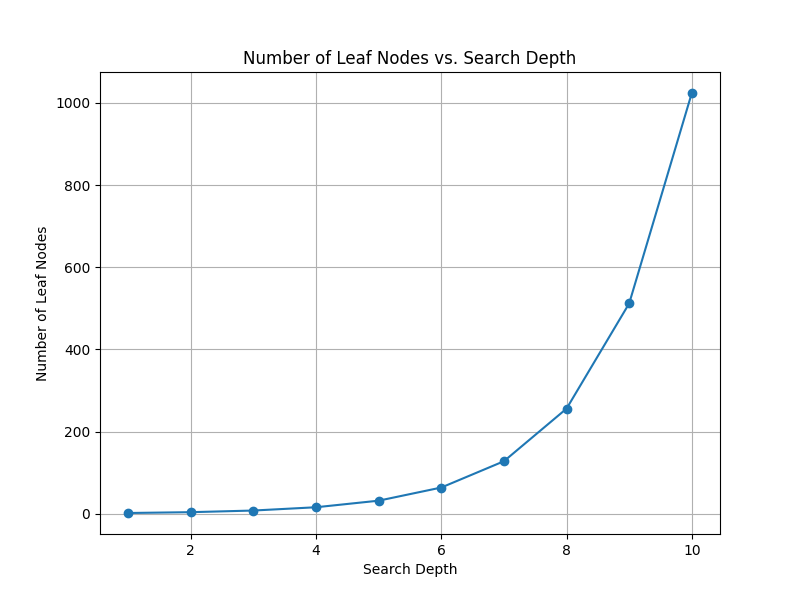


<!-- <div class="question_frame"> --><!-- start of question_frame -->


In [ ]:
t = """

        <h1>Memory Requirements for Breadth First Search</h1>
        <div class="question_body">
             
<p>Assume that each node in your search requires 64
bytes.</p>

<p>Estimate the amount of memory necessary to store
the all leaf nodes, assuming that the search has an
average branching factor b=14.9 and depth d=25.
</p>

        </div><!-- end of question_body -->
    
"""
display(HTML(t))


<div class="question_marks">
<span class="mark_num" style="text-align:right">5</span> marks
</div><!-- end of question_marks -->



<p>The amount of memory to store the leaf nodes
for a search with an average branching factor b=14.9 and
depth d=25: [3.47 x 10^33 bytes]


<p>Show your work and explain your answer in this cell. If you want to, you can add additional markdown and code cells after this cell.</p>
Number of leaf nodes=14.9 ^ 25  Memory required= 14.9 ^ 25 x 64 = 3.47×10^33


<!-- </div> --><!-- end of question_frame -->


<!-- <div class="question_frame"> --><!-- start of question_frame -->


In [ ]:
t = """

        <h1>Heuristic Functions</h1>
        <div class="question_body">
             
<p>One way to speed up search is through the use of heuristic
functions, that can guide the search by focusing on more 
promising alternatives.</p>

<p>Assume that you have a search space with an average
branching factor of 18.5.</p>

<p>It takes your computer 10000 seconds to find a solution
at depth 22.</p>

<p>To what search depth can you search if your heuristic
function reduces the branching factor to 4.3
</p>

        </div><!-- end of question_body -->
    
"""
display(HTML(t))


<div class="question_marks">
<span class="mark_num" style="text-align:right">5</span> marks
</div><!-- end of question_marks -->



<p>Search depth that can be searched if branching factor
is reduced from 18.5 to 4.3: [6.32]


<p>Show your work and explain your answer in this cell. If you want to, you can add additional markdown and code cells after this cell.</p>
10000=O(18.5^22)       10000=O((4.3)^d)        (4.3)^d=10000
     d x ln(4.3) = ln(10000) d=6.32

<!-- </div> --><!-- end of question_frame -->
